### Ödev 1:
Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz.

Ağ yapısı:

Conv2D(32,(3,3))

relu activation

Conv2D(64,(3,3))

relu activation

Maxpooling ((2,2))

Conv2D(128,(3,3))

relu activation

Conv2D(64,(3,3))

relu activation

Flatten()

Dense 256

dropout 0.25

dense 128

dropout 0.3

dense layer for last (Buradaki bilgileri sizden bekliyorum.)

10 epoch olacak şekilde çalıştırmanızı isitiyorum.

daha sonrasında bathc_size 32 64 128 256 512 1024 olacak şekilde deneyiniz. Accuracy değerlerini ve çalışma süreleriniz karşılaştırnız. Bunu plot olarak çizdiriniz.

In [1]:
from keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255

In [6]:
from keras.utils import np_utils,to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import SGD, RMSprop

model=Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation="relu"))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation="softmax"))

optimizer=RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))
score1 = model.evaluate(x_test,y_test)
model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))
print(model.evaluate(x_test,y_test))
score2 = model.evaluate(x_test,y_test)
model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))
print(model.evaluate(x_test,y_test))
score3 = model.evaluate(x_test,y_test)
model.fit(x_train,y_train,batch_size=256,epochs=10,verbose=1,validation_data=(x_test,y_test))
print(model.evaluate(x_test,y_test))
score4 = model.evaluate(x_test,y_test)
model.fit(x_train,y_train,batch_size=512,epochs=10,verbose=1,validation_data=(x_test,y_test))
print(model.evaluate(x_test,y_test))
score5 = model.evaluate(x_test,y_test)
model.fit(x_train,y_train,batch_size=1024,epochs=10,verbose=1,validation_data=(x_test,y_test))
print(model.evaluate(x_test,y_test))
score6 = model.evaluate(x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 364s 194ms/step - loss: 0.0646 - accuracy: 0.9824 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 2/10
1875/1875 [==============================] - 340s 181ms/step - loss: 0.0562 - accuracy: 0.9866 - val_loss: 0.0394 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 331s 177ms/step - loss: 0.0596 - accuracy: 0.9868 - val_loss: 0.0416 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 320s 171ms/step - loss: 0.0634 - accuracy: 0.9875 - val_loss: 0.0659 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 330s 176ms/step - loss: 0.0661 - accuracy: 0.9862 - val_loss: 0.0494 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 324s 173ms/step - loss: 0.0677 - accuracy: 0.9861 - val_loss: 0.0871 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 322s 172ms/step - loss: 0.0749 - accuracy: 0.9862 - val_

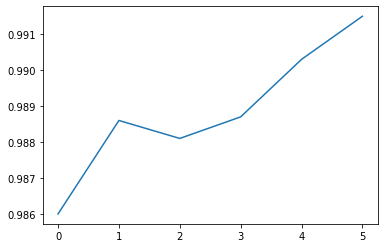

In [21]:
list10=[score1[1],score2[1],score3[1],score4[1],score5[1],score6[1]]
plt.plot(list10)